In [1]:
import numpy as np
import pandas as pd

In [2]:
cars = pd.read_csv('data/quikr_car.csv')

In [3]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
cars.shape

(892, 6)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
cars['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
cars['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [8]:
cars['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [9]:
cars['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## Quality

- year has many non-year values
- year object to int
- Price has 'Ask for Price'
- Price object to int
- kms_driven has kms with integers
- kms_driven object to int
- kms_driven has NaN values
- fuel_type has NaN values
- keep first three words of name

## Cleaning

In [10]:
backup = cars.copy()

In [11]:
cars = cars[cars['year'].str.isnumeric()]

In [12]:
cars['year'] = cars['year'].astype(int)

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [14]:
cars['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [15]:
cars = cars[cars['Price'] != "Ask For Price"]

In [16]:
cars['Price'] = cars['Price'].str.replace(',', '').astype(int)

In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [18]:
cars['kms_driven'] = cars['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [19]:
cars = cars[cars['kms_driven'].str.isnumeric()]

In [20]:
cars['kms_driven'] = cars['kms_driven'].astype(int)

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [22]:
cars = cars[~cars['fuel_type'].isna()]

In [23]:
cars['name'] = cars['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [24]:
cars

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
cars = cars.reset_index(drop=True)

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [27]:
cars.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [28]:
cars = cars[cars['Price'] < 5e6].reset_index(drop=True)

In [29]:
cars.to_csv('data.csv')

## <b>Model</b>

In [30]:
X = cars.drop(columns='Price')
y = cars['Price']

In [31]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [32]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [35]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [36]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [37]:
column_transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name','company','fuel_type']),
                                         remainder='passthrough')

In [38]:
lr = LinearRegression()

In [39]:
pipeline = make_pipeline(column_transformer, lr)

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [41]:
y_predictions = pipeline.predict(X_test)

In [42]:
y_predictions

array([ 147263.94213837,  523635.34592864, 1237827.8343711 ,
         75426.28749731,   92287.90045384,  293632.33024952,
        347395.461125  ,  632614.75715895,  185839.18562593,
        384292.7693996 ,  166093.42081693,  878519.0691703 ,
        458973.80409858,  462619.35319309,  515743.8528782 ,
        418229.93744907,  367851.23302302,  452621.30366811,
        769165.225876  , 1010720.70877294,   84089.37055048,
        136525.94028544,  256418.0714436 ,  192635.14571881,
        279404.15940462,  480715.18570778,  200791.37198542,
        279404.15940462,  467838.99861306,  334461.53449108,
         71601.76680344,  807348.90198345,  527804.88282162,
        139086.12016675,   14804.93419783,  434494.29175952,
        168367.24166371,  536192.53601293,  872490.92844468,
        425885.76718548,   96366.12402004,  255875.66849534,
        582354.9499826 ,  455108.79700951,  456184.75832334,
        451532.34815712,  455143.00590779,  694021.87714475,
        221022.01298052,

In [43]:
r2_score(y_test, y_predictions)

0.7040007785632445

In [44]:
scores = []
for i in range(5000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipeline = make_pipeline(column_transformer, lr)
    pipeline.fit(X_train, y_train)
    y_predictions = pipeline.predict(X_test)
    scores.append(r2_score(y_test, y_predictions))

In [45]:
np.argmax(scores)

2711

In [46]:
scores[np.argmax(scores)]

0.8639294570456644

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=np.argmax(scores))
lr = LinearRegression()
pipeline = make_pipeline(column_transformer, lr)
pipeline.fit(X_train, y_train)
y_predictions = pipeline.predict(X_test)
r2_score(y_test, y_predictions)

0.8639294570456644

<AxesSubplot: xlabel='year', ylabel='Price'>

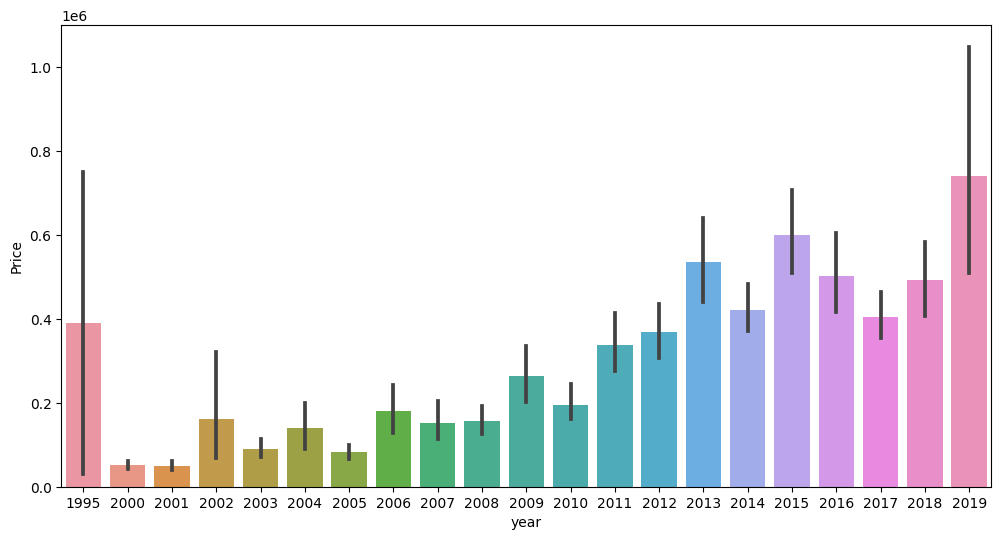

In [48]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = 'year', y = 'Price', data = cars)

In [49]:
 import pickle

In [50]:
pickle.dump(pipeline, open('LinearRegressionModel.pkl', 'wb'))

In [51]:
pipeline.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], columns = ['name', 'company', 'year', 'kms_driven', 'fuel_type']))

array([465796.63941281])

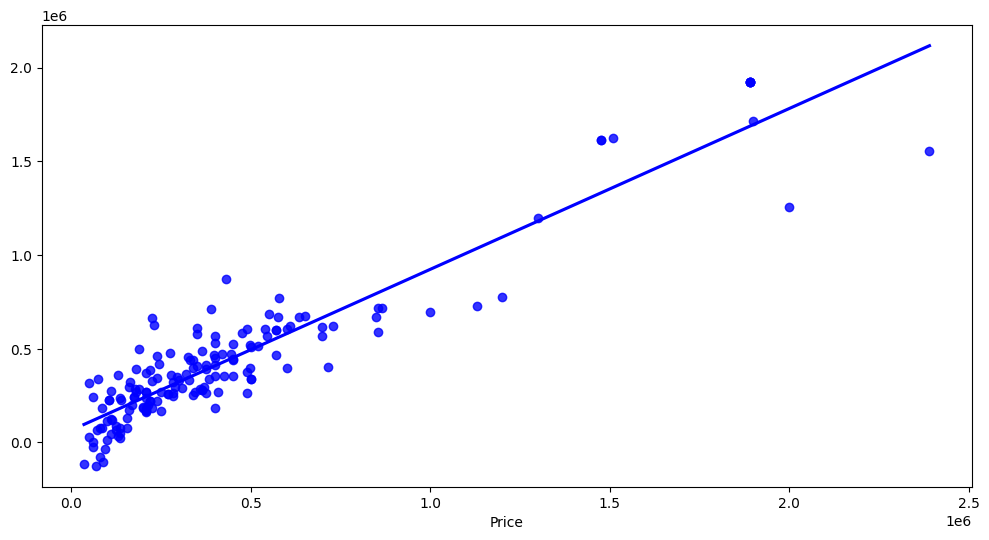

In [52]:
import seaborn as sns
sns.regplot(x=y_test,y=y_predictions,ci=None,color ='blue');

In [53]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Error Table")
print("Mean Absolute Error      : ", metrics.mean_absolute_error(y_test, y_predictions))
print("Mean Squared Error       : ", metrics.mean_squared_error(y_test, y_predictions))
print("Root Mean Squared Error  : ", np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
print("R Squared Error          : ", metrics.r2_score(y_test, y_predictions))

Error Table
Mean Absolute Error      :  110993.81747837744
Mean Squared Error       :  26643972078.457726
Root Mean Squared Error  :  163229.81369363173
R Squared Error          :  0.8639294570456644
